# Creating and Training custom neural network on CIFAR-10 Data

In [2]:
from keras.datasets import cifar10

In [3]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
xtest.shape

(10000, 32, 32, 3)

## Labels in cifar 10

In [6]:
labels = {0:'airplane',
          1:'automobile',
          2:'bird',
          3:'cat',
          4:'deer',
          5:'dog',
          6:'frog',
          7:'horse',
          8:'ship',
          9:'truck'}

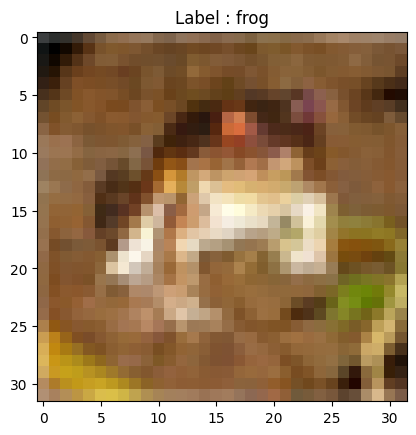

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0])
plt.title(f'Label : {labels[ytrain[0][0]]}')
plt.show()

### Showing top 9 images from data

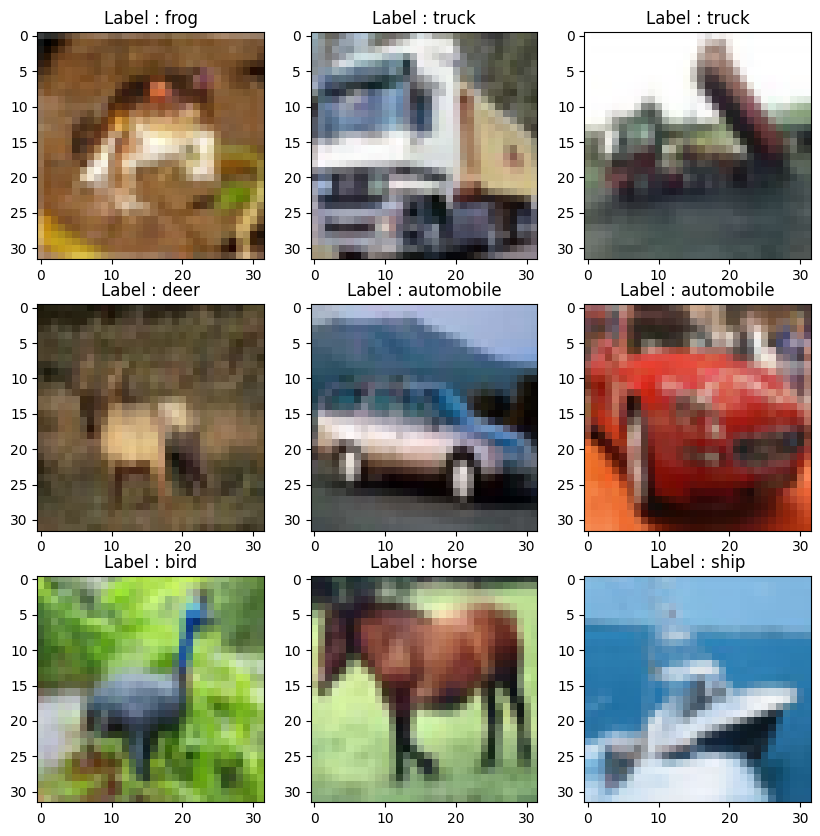

In [8]:
plt.figure(figsize=(10, 10))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtrain[i])
    plt.title(f'Label : {labels[ytrain[i][0]]}')
plt.show()

### Scale xtrain and xtest data

In [9]:
xtrain_scl = xtrain/255
xtest_scl = xtest/255

### Categorical for ytrain and ytest

In [10]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

### Creating a neural network

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [13]:
model = Sequential()

# Layer1 Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Layer2 Convolution
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Layer3 Flatten
model.add(Flatten())

# Dense Layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=20)

Epoch 1/20


1250/1250 [==============================] - 50s 37ms/step - loss: 1.6206 - accuracy: 0.4661 - val_loss: 1.2157 - val_accuracy: 0.5807
Epoch 2/20
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0664 - accuracy: 0.6253 - val_loss: 0.8844 - val_accuracy: 0.6826
Epoch 3/20
1250/1250 [==============================] - 45s 36ms/step - loss: 0.9149 - accuracy: 0.6781 - val_loss: 0.9114 - val_accuracy: 0.6814
Epoch 4/20
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8369 - accuracy: 0.7079 - val_loss: 0.7435 - val_accuracy: 0.7432
Epoch 5/20
1250/1250 [==============================] - 45s 36ms/step - loss: 0.7726 - accuracy: 0.7300 - val_loss: 0.7037 - val_accuracy: 0.7501
Epoch 6/20
1250/1250 [==============================] - 45s 36ms/step - loss: 0.7179 - accuracy: 0.7494 - val_loss: 0.7483 - val_accuracy: 0.7435
Epoch 7/20
1250/1250 [==============================] - 45s 36ms/step - loss: 0.6707 - accuracy: 0.7670 - val_loss: 0.6877

### Learning curve

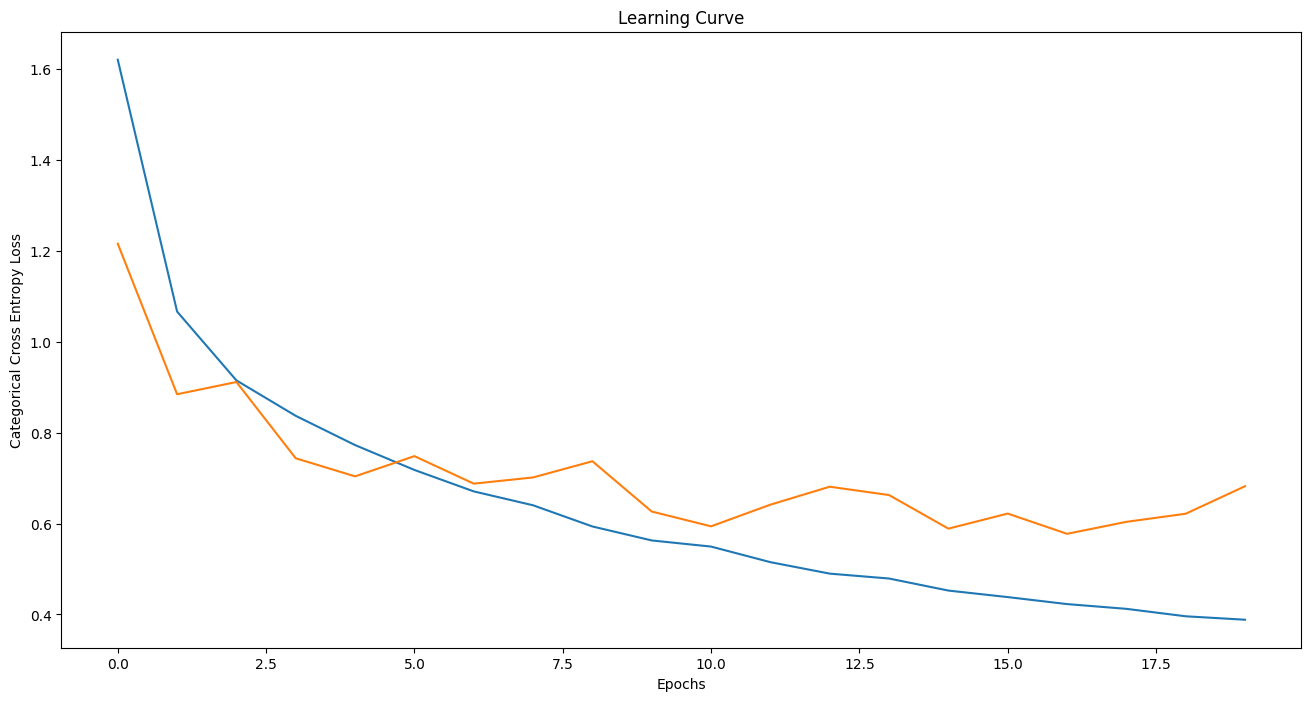

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.title('Learning Curve')
plt.show()

### Evaluate model

In [18]:
model.evaluate(xtrain_scl, ytrain_cat)

1563/1563 [==============================] - 12s 8ms/step - loss: 0.3072 - accuracy: 0.9004


[0.3072127401828766, 0.90038001537323]

In [19]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 3s 10ms/step - loss: 0.6912 - accuracy: 0.7833


[0.6911717653274536, 0.78329998254776]

### Predicions

In [21]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 2s 8ms/step


In [22]:
import numpy as np
ypred_tr = np.argmax(yprob_tr, axis=-1)
ypred_ts = np.argmax(yprob_ts, axis=-1)

In [23]:
ypred_tr[0:5]

array([6, 9, 9, 4, 1], dtype=int64)

In [26]:
ytrain[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [27]:
ypred_ts[0:5]

array([3, 8, 8, 8, 6], dtype=int64)

In [28]:
ytest[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

### Confusion Matrix

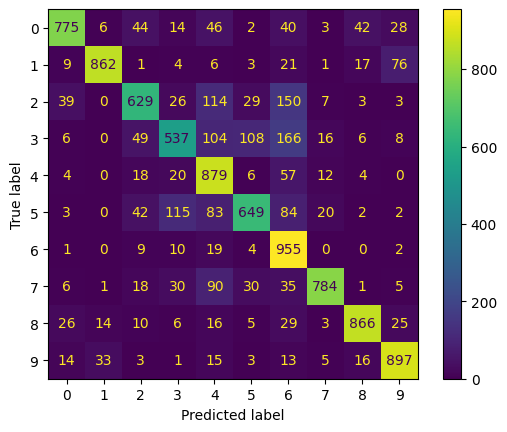

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Classification Report

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1000
           1       0.94      0.86      0.90      1000
           2       0.76      0.63      0.69      1000
           3       0.70      0.54      0.61      1000
           4       0.64      0.88      0.74      1000
           5       0.77      0.65      0.71      1000
           6       0.62      0.95      0.75      1000
           7       0.92      0.78      0.85      1000
           8       0.90      0.87      0.89      1000
           9       0.86      0.90      0.88      1000

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



### Save the keras model

In [31]:
model.save('Cifar10Model.keras')